<a href="https://colab.research.google.com/github/Eduzc07/machinelearning/blob/master/7_Agriculture/PlantAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plant Analysis

# Download Datasets

## 1) Using Kaggle API
As first step we have to install de kaggle API.

In [0]:
!pip install -q kaggle

Then, we are going to save the API key in order to use the API.

In [1]:
from googleapiclient.discovery import build
import io, os
from googleapiclient.http import MediaIoBaseDownload
from google.colab import auth

auth.authenticate_user()
drive_service = build('drive', 'v3')
results = drive_service.files().list(
        q="name = 'kaggle.json'", fields="files(id)").execute()
kaggle_api_key = results.get('files', [])
filename = "/root/.kaggle/kaggle.json"  # NOTE: This is different from the Medium post!
os.makedirs(os.path.dirname(filename), exist_ok=True)
request = drive_service.files().get_media(fileId=kaggle_api_key[0]['id'])
fh = io.FileIO(filename, 'wb')
downloader = MediaIoBaseDownload(fh, request)
done = False
while done is False:
    status, done = downloader.next_chunk()
    print("Download %d%%." % int(status.progress() * 100))
os.chmod(filename, 600)

Download 100%.


In case it does not work, please "reset all runtimes", not restart.

Source: ["404 - Not Found" when downloading dataset from Google Colab](https://github.com/Kaggle/kaggle-api/issues/110)

In [2]:
!kaggle datasets list

ref                                                       title                                               size  lastUpdated          downloadCount  
--------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
tristan581/17k-apple-app-store-strategy-games             17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16           3213  
dgomonov/new-york-city-airbnb-open-data                   New York City Airbnb Open Data                       2MB  2019-08-12 16:24:45          33623  
gustavomodelli/forest-fires-in-brazil                     Forest Fires in Brazil                              31KB  2019-08-24 16:09:16           4408  
shuyangli94/food-com-recipes-and-user-interactions        Food.com Recipes and Interactions                  261MB  2019-10-12 06:30:37           1405  
rajeevw/ufcdata                                           UFC-Fight historical dat

- Now, the Datasets from Kaggle
[Weed Detection in Soybean Crops](https://www.kaggle.com/fpeccia/weed-detection-in-soybean-crops) will be downloaded.

In [3]:
!kaggle datasets list -s weed

ref                                                        title                                          size  lastUpdated          downloadCount  
---------------------------------------------------------  --------------------------------------------  -----  -------------------  -------------  
terminus7/pokemon-challenge                                Pokemon- Weedle's Cave                        285KB  2017-09-21 08:43:04          23663  
vbookshelf/v2-plant-seedlings-dataset                      V2 Plant Seedlings Dataset                      3GB  2018-12-13 14:20:52           3360  
fpeccia/weed-detection-in-soybean-crops                    Weed Detection in Soybean Crops                 2GB  2018-09-12 11:02:43           1251  
kingburrito666/cannabis-strains                            Cannabis Strains                              415KB  2017-12-16 23:58:13           1693  
gavinarmstrong/open-sprayer-images                         Open Sprayer images                           5

In [4]:
!kaggle datasets download -d fpeccia/weed-detection-in-soybean-crops

 99% 2.35G/2.37G [00:56<00:00, 45.6MB/s]
100% 2.37G/2.37G [00:56<00:00, 45.2MB/s]


The Data has been downloaded in .zip file, then we have to unzip them.



```
!yes | unzip  weed-detection-in-soybean-crops.zip
```



In [4]:
import zipfile
with zipfile.ZipFile("weed-detection-in-soybean-crops.zip","r") as zip_ref:
    zip_ref.extractall("./")

print("Its has been unzipped succsessfully!.")

Its has been unzipped succsessfully!.


In [0]:
import random
import numpy as np
import pandas as pd
import os
import cv2
import glob
import matplotlib.pyplot as plt

%matplotlib inline

In [0]:
data_dir = r'./dataset/dataset/' # Setting the dataset directory
classes = ['broadleaf', 'grass', 'soil', 'soybean'] # Setting all the available classes
n_class = len(classes)

In [38]:
#Get number of images per class
for i, cls in enumerate(classes):
  path, dirs, files = next(os.walk(data_dir + cls))
  print("Number of images from \'{}\' are {}".format(cls, len(files)))

Number of images from 'broadleaf' are 1191
Number of images from 'grass' are 3520
Number of images from 'soil' are 3249
Number of images from 'soybean' are 7376


In [0]:
#We are going to take only 1100 from all of them, the limit is set due to boadleaf
num_file = 1100
all_files = []
num_data = num_file * len(classes)
Y_set = np.zeros(num_data) # Initialize all output values with 0

# Get the files
for i, cls in enumerate(classes):
  all_files += [f for f in glob.glob(data_dir + cls + '/*.tif')][:num_file]
  Y_set[i * num_file: (i + 1) * num_file] = i # Label all classes with int [0.. len(classes)]

#Expand
Y_set = np.expand_dims(Y_set, -1)

# Size
image_width = 100
image_height = 100
image_channel = 3
dimension = image_width * image_height * image_channel

X_set = np.ndarray(shape=(num_data, image_width, image_height, image_channel), dtype=np.uint8) # Create a nd array

for i, file in enumerate(all_files):
  X_set[i] = cv2.resize(cv2.imread(file), (image_width, image_height)) # Add and load all images

## Data Visualization

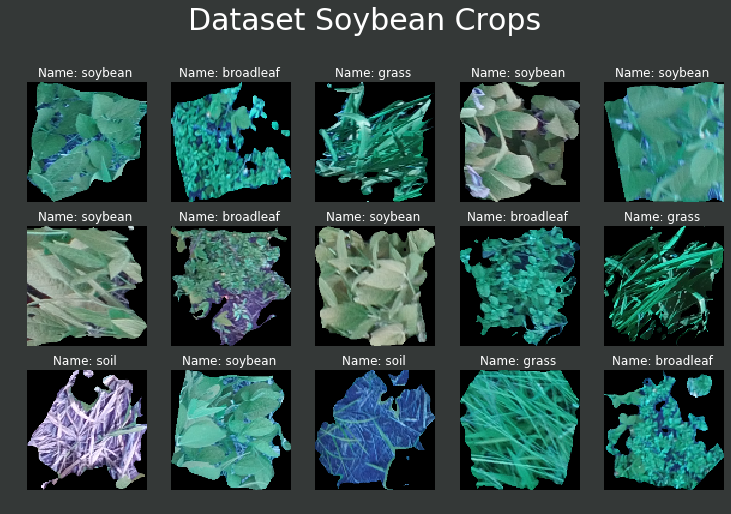

In [219]:
#Number of samples
nb_samples = X_set.shape[0]

#Plot size Configuration
rows = 3
cols = 5
size_w = 2.5
size_h = 2.5

fig, ax = plt.subplots(rows, cols, figsize=(cols*size_w, rows*size_h))
fig.patch.set_facecolor('xkcd:charcoal')
plt.suptitle('Dataset Soybean Crops', fontsize=30, color="white", y=1.02)

for idx in range(0, rows*cols):
    i = random.randint(0, nb_samples - 1)
    tittle = 'Name: {} '.format(classes[int(Y_set[i])])
    img = X_set[i].astype('uint8')

    ax[idx//cols, idx%cols].imshow(img, cmap = 'gray', interpolation='nearest')
    ax[idx//cols, idx%cols].axis('off')
    ax[idx//cols, idx%cols].set_title(tittle, color="white", fontsize=12)

plt.show()

## Split Datasets

In [370]:
#Number of samples
nb_samples = X_set.shape[0]

p_trainData = int(nb_samples*90./100) #90%
p_valData = int(nb_samples*5./100) #5%
p_testData = int(nb_samples*5./100)
print('Train: {}, val: {} and test: {}'.format(p_trainData, p_valData, p_testData))
train_set_x_orig = np.empty(shape=(p_trainData, image_width, image_height, image_channel), dtype=np.uint8)
val_set_x_orig = np.empty(shape=(p_valData, image_width, image_height, image_channel), dtype=np.uint8)
test_set_x_orig = np.empty(shape=(p_testData, image_width, image_height, image_channel), dtype=np.uint8)

train_set_y = np.zeros((p_trainData, n_class))
val_set_y = np.zeros((p_valData, n_class))
test_set_y = np.zeros((p_testData, n_class))

###
train_set_y_i = np.zeros(p_trainData)

trainData = int(p_trainData/4)
valData = int(p_valData/4)
testData = int(p_testData/4)

# Set all x and y values
for i, cls in enumerate(classes):
  train_set_x_orig[trainData * i: trainData * (i + 1)] = X[np.where(Y == i)[0][:trainData]]
  test_set_x_orig[testData * i: testData * (i + 1)] = X[np.where(Y == i)[0][trainData:trainData + testData]]
  val_set_x_orig[valData * i: valData * (i + 1)] = X[np.where(Y == i)[0][trainData + testData:]]
  
  yArray = np.zeros(n_class)
  yArray[i] = 1
  train_set_y[trainData * i: trainData * (i + 1)] = yArray
  test_set_y[testData * i: testData * (i + 1)] = yArray
  val_set_y[valData * i: valData * (i + 1)] = yArray

  train_set_y_i[trainData * i: trainData * (i + 1)] = i


# Select random x and y train data
train_indexes = np.random.permutation(train_set_x_orig.shape[0]) # Create random indexes array with the length of X_train.shape[0]
Y_train = train_set_y_i[train_indexes].astype(int) 
X_train = X_train[train_indexes]

# Reshape the train, test, val data
X_train = np.reshape(X_train, (X_train.shape[0], -1)).astype('float64')
X_test = np.reshape(X_test, (X_test.shape[0], -1)).astype('float64')
X_val = np.reshape(X_val, (X_val.shape[0], -1)).astype('float64')

# Create custom tiny dataset for testing
X_tiny = X_train[100:110].astype('float64')
Y_tiny = Y_train[100:110].astype(int)
num_dev = 500

# Create custom dev dataset for testing
X_dev = X_train[0:num_dev].astype('float64')
Y_dev = Y_train[0:num_dev].astype(int)

# Compute the mean image
mean_image = np.mean(X_train, axis=0) # axis=0. stack horizontally
# Subtract the mean image from train and test data 
X_train -= mean_image
X_val -= mean_image 
X_test -= mean_image
X_dev -= mean_image
X_tiny -= mean_image

print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("X_val shape", X_val.shape)
print("X_dev shape", X_dev.shape)
print("X_tiny shape", X_tiny.shape)

Train: 3960, val: 220 and test: 220
X_train shape (3960, 30000)
X_test shape (220, 30000)
X_val shape (220, 30000)
X_dev shape (500, 30000)
X_tiny shape (10, 30000)


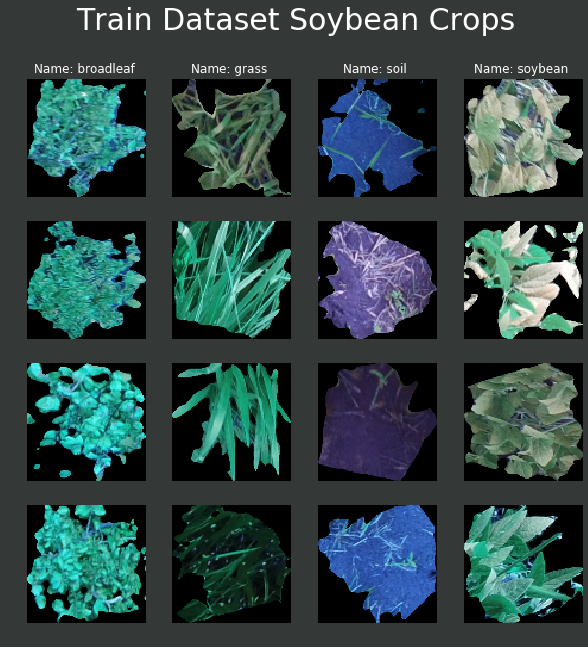

In [397]:
classes = ['broadleaf', 'grass', 'soil', 'soybean']
n_class = len(classes)
samples_per_class = 4

#Plot size Configuration
rows = samples_per_class
cols = n_class
size_w = 2.5
size_h = 2.5

fig, ax = plt.subplots(rows, cols, figsize=(cols*size_w, rows*size_h))
fig.patch.set_facecolor('xkcd:charcoal')
plt.suptitle('Train Dataset Soybean Crops', fontsize=30, color="white")

# Plot 4 images of each class
for Y_i, cls in enumerate(classes):
  indexes = np.flatnonzero(Y_i == train_set_y_i)
  indexes = np.random.choice(indexes, samples_per_class, replace=False)
  for i, index, in enumerate(indexes):

    tittle = 'Name: {} '.format(cls)
    img = train_set_x_orig[index].astype('uint8')
    ax[i, Y_i].imshow(img, cmap = 'gray', interpolation='nearest')
    ax[i, Y_i].axis('off')
    if i == 0:
      ax[i, Y_i].set_title(tittle, color="white", fontsize=12)

plt.show()

In [0]:
class NeuralNetwork:
  hidden_size = 200
  input_size = image_width * image_height * image_channel
  output_size = n_class

  """
  w1: first layer weight
  w2: second layer weight
  """
  w1 = 1e-3 * np.random.randn(input_size, hidden_size)
  b1 = np.zeros(hidden_size)
  w2 = 1e-3 * np.random.randn(hidden_size, output_size)
  b2 = np.zeros(output_size)
    
  alpha = 1e-5
  batch_size = 100
    
  epochs = 500
  
  def train(self, X, Y, X_val, Y_val):
    N, D = X.shape
    N_val = X_val.shape[0]
    iteration_per_epoch = max(N / self.batch_size, 1)

    loss_hist = []
    train_acc_hist = []
    val_acc_hist = []
    
    for it in range(self.epochs):
      sampling = np.random.choice(np.arange(N), self.batch_size, replace=False) # Create random array data

      # Getting batches for x and y
      X_batch = X[sampling]
      Y_batch = Y[sampling]

      loss, grads = self.loss(X_batch, Y=Y_batch)
      loss_hist.append(loss)

      # Make the model learning and reshape the parameters of the network
      self.w1 += -1.0 * self.alpha * grads['w1']
      self.b1 += -1.0 * self.alpha * grads['b1']
      self.w2 += -1.0 * self.alpha * grads['w2']
      self.b2 += -1.0 * self.alpha * grads['b2']

      if it % 10 == 0:
        print('iteration: %d / %d | Loss: %f' % (it, self.epochs, loss))
    
      if it % iteration_per_epoch == 0:
        train_acc = (self.predict(X_batch) == Y_batch).mean()
        val_acc = (self.predict(X_val) == Y_val).mean()
        train_acc_hist.append(train_acc)
        val_acc_hist.append(val_acc)

        self.alpha *= 0.95
    
    return {
        'loss_hist': loss_hist,
        'train_acc_hist': train_acc_hist,
        'val_acc_hist': val_acc_hist
    }

  def relu(self, z):
    return np.maximum(0, z)
  
  def predict(self, X):
    Y_pred = None
    layer1 = self.relu(X.dot(self.w1) + self.b1)
    scores = layer1.dot(self.w2) + self.b2
    Y_pred = np.argmax(scores, axis=1)
    return Y_pred

  def loss(self, X, Y = None):
    N, D = X.shape

    # Calculate the loss of our layer1
    layer1 = self.relu(X.dot(self.w1) + self.b1)
    scores = layer1.dot(self.w2) + self.b2

    if (Y is None):
      return scores

    # Calculate the actual loss
    scores -= scores.max()
    scores = np.exp(scores)
    scores_sumexp = np.sum(scores, axis=1)
    softmax = scores / scores_sumexp.reshape(N, 1)
    loss = -1.0 * np.sum(np.log(softmax[range(N), Y]))
    loss /= N

    grads = {}
    correct_class_scores = scores[range(N), Y]
    softmax[range(N), Y] = -1.0 * (scores_sumexp - correct_class_scores) / scores_sumexp
    softmax /= N

    grads['w2'] = layer1.T.dot(softmax)
    grads['b2'] = np.sum(softmax, axis=0)

    hidden = softmax.dot(self.w2.T)

    grads['w1'] = X.T.dot(hidden)
    grads['b1'] = np.sum(hidden, axis=0)

    return loss, grads

In [411]:
nn = NeuralNetwork()
stats = nn.train(X_train, Y_train, X_val, Y_val)

iteration: 0 / 500 | Loss: 1.387447
iteration: 10 / 500 | Loss: 1.384048
iteration: 20 / 500 | Loss: 1.375583
iteration: 30 / 500 | Loss: 1.393215
iteration: 40 / 500 | Loss: 1.393156
iteration: 50 / 500 | Loss: 1.384464
iteration: 60 / 500 | Loss: 1.385197
iteration: 70 / 500 | Loss: 1.379301
iteration: 80 / 500 | Loss: 1.378792
iteration: 90 / 500 | Loss: 1.383379
iteration: 100 / 500 | Loss: 1.393296
iteration: 110 / 500 | Loss: 1.398125
iteration: 120 / 500 | Loss: 1.382907
iteration: 130 / 500 | Loss: 1.378682
iteration: 140 / 500 | Loss: 1.389792
iteration: 150 / 500 | Loss: 1.382235
iteration: 160 / 500 | Loss: 1.383540
iteration: 170 / 500 | Loss: 1.383416
iteration: 180 / 500 | Loss: 1.392374
iteration: 190 / 500 | Loss: 1.389257
iteration: 200 / 500 | Loss: 1.400468
iteration: 210 / 500 | Loss: 1.396444
iteration: 220 / 500 | Loss: 1.377717
iteration: 230 / 500 | Loss: 1.376983
iteration: 240 / 500 | Loss: 1.381923
iteration: 250 / 500 | Loss: 1.383276
iteration: 260 / 500 | 

In [412]:
print((nn.predict(X_test) == Y_test).mean())

0.2318181818181818


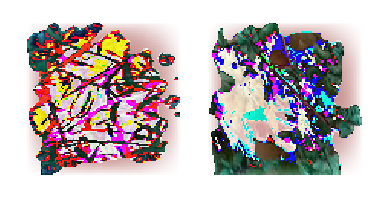

In [415]:
index = np.flatnonzero(0 == Y_train)
index = np.random.choice(index, 1, replace=False)
prediction = nn.predict(X_train[index])
img = X_train[index].reshape(image_width, image_height, image_channel).astype('uint8')

plt.subplot(1, 2, 1)
plt.imshow(img, cmap = 'gray', interpolation='nearest')
plt.axis('off')
plt.title('{} | {}'.format(classes[0], classes[prediction[0]]), fontsize=12, color="white")


index = np.flatnonzero(1 == Y_train)
index = np.random.choice(index, 1, replace=False)
prediction = nn.predict(X_train[index])
img = X_train[index].reshape(image_width, image_height, image_channel).astype('uint8')

plt.subplot(1, 2, 2)
plt.imshow(img, cmap = 'gray', interpolation='nearest')
plt.axis('off')
plt.title('{} | {}'.format(classes[0], classes[prediction[0]]), fontsize=12, color="white")

plt.show()